Si tratta di un worflow che avevo preparato per la expainability delle reti neurali basato su MNIST che però non ho poi utilizzato.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Preparazione dati di MNIST

In [2]:
# Carichiamo il dataset MNIST
# - train_images sono le immagini per la fase di addestramento
# - train_labels sono le etichette associate a queste immagini (numeri da 0 a 9) 

# test_images e test_labels sono simili a train_images e train_labels ma costituiscono 
# i dati per la fase di test (ne parleremo dopo)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Occorre trasformare le etichette dal formato numerico originale ad un formato
# confrontabile con l'output del percettrone. Usiamo il metodo predefinito di
# tf.keras.utils.to_categorical.

train_labels_ok = tf.keras.utils.to_categorical(train_labels)
test_labels_ok = tf.keras.utils.to_categorical(test_labels)

In [4]:
# È prassi fornire i dati in input in maniera normalizzata, come numeri compresi
# tra 0 ed 1. Pertanto, anche se non strettamente necessario, dividiamo tutti i
# numeri che compongono una immagine per 255.

train_images_ok = train_images / 255.0
test_images_ok = test_images / 255

# La prima rete

Riprendiamo qui la rete neural simile al percettrone che abbiamo presentato alla fine della 1° lezione.

In [6]:
network = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='hard_sigmoid')
])
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
network.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = network.fit(train_images_ok, train_labels_ok, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0517 - accuracy: 0.7379
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0261 - accuracy: 0.8765
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0223 - accuracy: 0.8909
Epoch 4/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0204 - accuracy: 0.8975
Epoch 5/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0193 - accuracy: 0.9016
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0186 - accuracy: 0.9047
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0180 - accuracy: 0.9071
Epoch 8/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0175 - accuracy: 0.9090
Epoch 9/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0171 - accuracy: 0.9108
Epoch 10/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0168 - accuracy: 0.9118

In [8]:
network.evaluate(test_images_ok, test_labels_ok)

313/313 [==============================] - 1s 1ms/step - loss: 0.0154 - accuracy: 0.9191


[0.015406408347189426, 0.9190999865531921]

# Visualizzazione pesi

In [11]:
# Determino i pesi della rete.

weights=network.layers[-1].get_weights()

In [12]:
# weights[1] è un elenco di 10 numeri (il bias dei 10 neuroni)

weights[1]

array([-1.0304863e+00, -3.2227093e-01, -8.4367031e-01, -1.2860960e+00,
       -6.5709859e-01,  1.8845893e-03, -1.0437469e+00, -2.7709302e-01,
       -2.4211462e+00, -1.4106199e+00], dtype=float32)

In [13]:
# weights[0] è un tensore di 7840 pesi, 784 per ogni neurone

weights[0].shape

(784, 10)

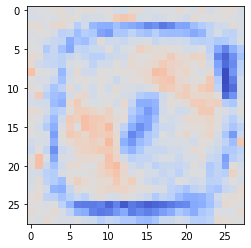

In [22]:
import matplotlib as mpl

# Extraggo i pesi associati al neurone 0 e li vedo come un'immagine bidimensionale 
# (faccio cioè l'inverso del layer Flatten)
#
# Per il significato dei colori, consultare l'elenco delle colormap su
# https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html.

# Per la colormap coolwarm, il blu indica un valore negativo, il rosso uno positivo.
# A colore più vivo corrisponde un valore assoluto superiore.


w = weights[0][:,0]
maxw = np.max(np.abs(weights[0]))
plt.imshow(w.reshape(28,28), norm = mpl.colors.Normalize(vmin=-maxw/2, vmax=maxw/2), cmap = plt.cm.coolwarm)

# Visualizzare i filtri di una rete convoluzionale

In [18]:
# Riadattiamo le immagini di training in modo che ogni immagine sia un tensore
# tridimensionale (operazione richiesta per dare in put le immagini ad un
# layer convoluzionale)

x_train = train_images_ok.reshape((60000, 28, 28, 1))
x_test = test_images_ok.reshape((10000, 28, 28, 1))

In [19]:
# Questa è la rete convoluzionale

network2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [21]:
# Addestriamo la rete

network2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
network2.fit(x_train, train_labels_ok, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 56s 118ms/step - loss: 0.1200 - accuracy: 0.9634
Epoch 2/10
469/469 [==============================] - 56s 118ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 3/10
469/469 [==============================] - 53s 113ms/step - loss: 0.0377 - accuracy: 0.9882
Epoch 4/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0299 - accuracy: 0.9902
Epoch 5/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0239 - accuracy: 0.9926
Epoch 6/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0197 - accuracy: 0.9932
Epoch 7/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0154 - accuracy: 0.9952
Epoch 8/10
469/469 [==============================] - 47s 99ms/step - loss: 0.0138 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0119 - accuracy: 0.9960
Epoch 10/10
469/469 [==============================] - 47s 101ms/step - los

In [23]:
# Determiniamo i pesi dei neuroni del 1° strato convoluzionale. Lo shape di questi
# pesi è 3 * 3 * 1 * 32. Dove:
# - 32 è il numero di filtri nel primo strato convoluzionale
# - 3 * 3 * 1è la dimensione del filtro 
# - 1 è il numero di canali della immagini di input (sarebbe 3 se fosse a colori)

weights = network2.layers[0].weights[0]
weights.shape

TensorShape([3, 3, 1, 32])

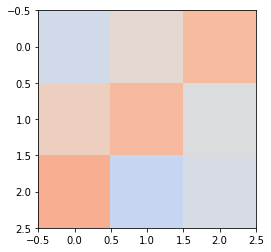

In [32]:
# Il filtro 27 sembra enfatizzare le line diagonali (da basso sx ad alto dx). Notare
# che riaddestrando la rete questi valori cambiano.

maxw = np.max(np.abs(weights))
plt.imshow(weights[:,:,0,27], norm = mpl.colors.Normalize(vmin=-maxw, vmax=maxw), cmap = plt.cm.coolwarm)

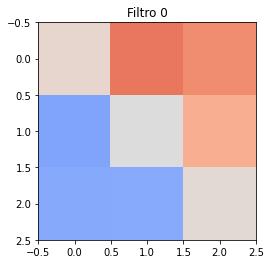

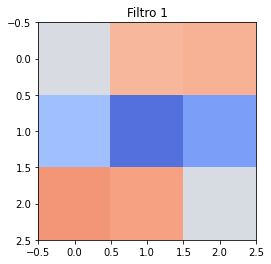

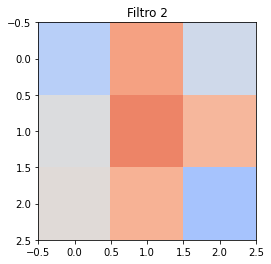

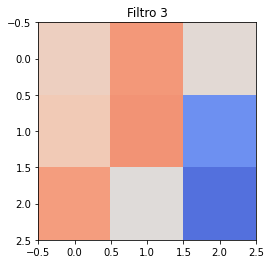

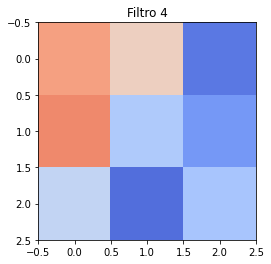

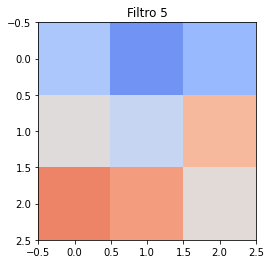

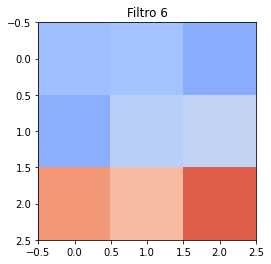

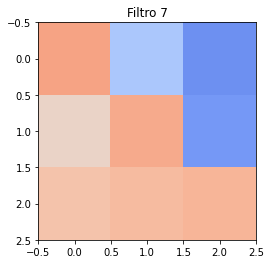

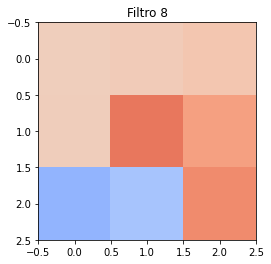

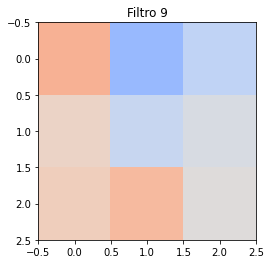

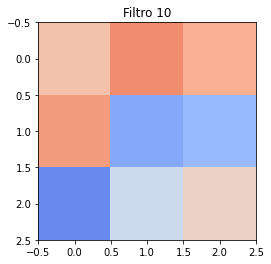

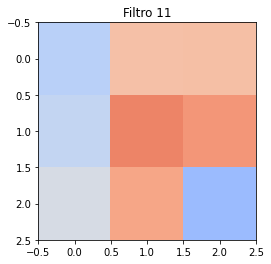

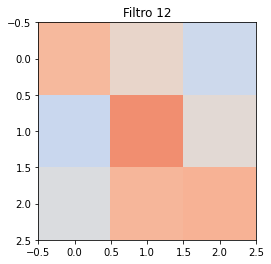

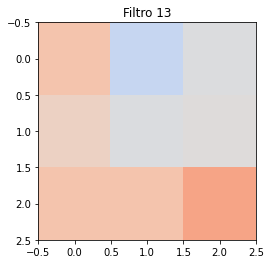

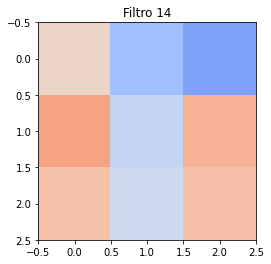

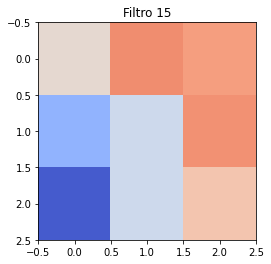

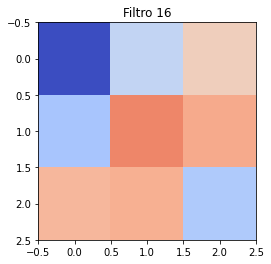

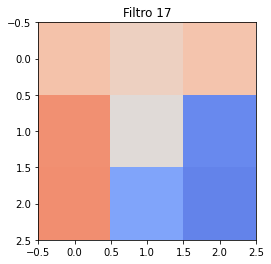

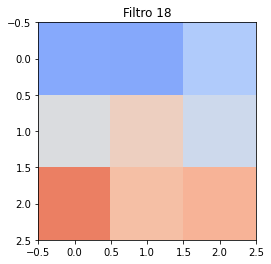

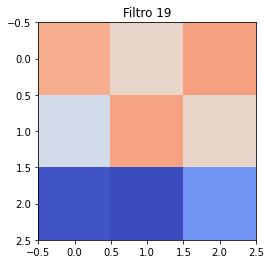

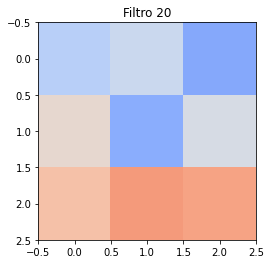

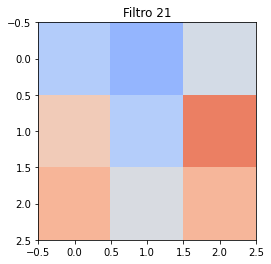

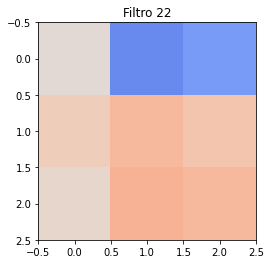

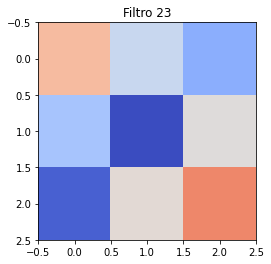

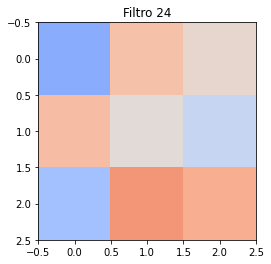

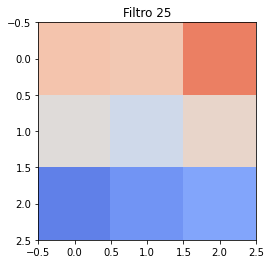

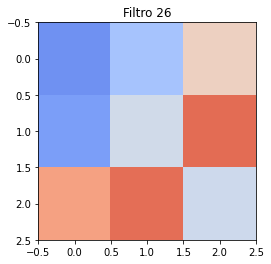

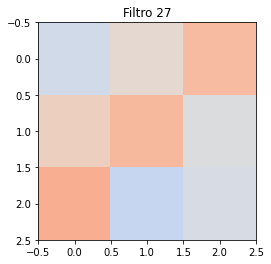

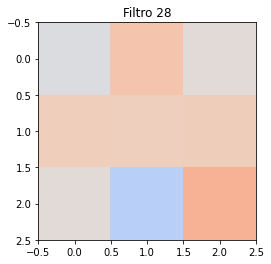

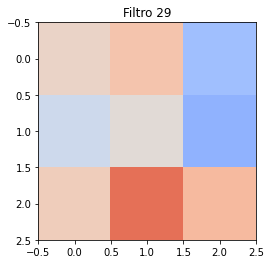

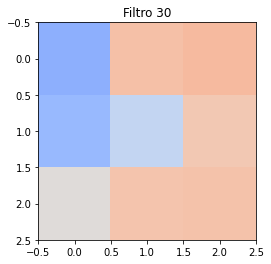

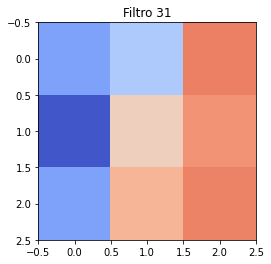

In [31]:
# Questi sono tutti i 32 filtri

for i in range(32):
  plt.title(f"Filtro {i}")
  plt.imshow(weights[:,:,0, i], norm = mpl.colors.Normalize(vmin=-maxw, vmax=maxw), cmap=plt.cm.coolwarm)
  plt.show()


# Visualizzare gli output degli strati intermedi

In [34]:
# Genero un modello con i primi 5 layer e calcolo le attivazioni generate dalla
# immagine numero 0

layer_outputs = [layer.output for layer in network2.layers[:5]]
activation_model = tf.keras.models.Model(inputs=network2.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[0:1,])

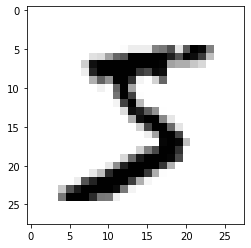

In [41]:
# Questa è l'immagine numero 0

plt.imshow(train_images[0], cmap = plt.cm.binary)

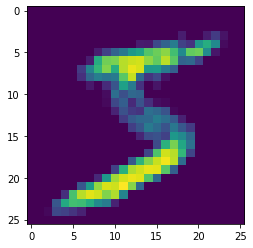

In [43]:
# Questa è l'attivazione del canale 27. Notare come le righe diagonali nella
# direzione da basso sinistra ad alto destra sono enfatizzate, come intuibile dal
# filtro corrisponsente.

plt.imshow(activations[0][0, :, :, 27])

In [44]:
# Questo codice visualizza tutte le attivazioni di tutti gli strati convoluzionali.
# Notare che i primi strati generano attivazioni che sono alterazioni dell'immagine
# di partenza, mentre gli strati più avanzati hanno meno corrispondenza con l'immagine
# iniziale.

def plot_all_activations(activation_model, img):
  activations = activation_model.predict(img)
  layer_names = []
  for layer in activation_model.outputs:
      layer_names.append(layer.name)
  images_per_row = 16

  for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
      for row in range(images_per_row):
        channel_image = layer_activation[0,:,:,col*images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


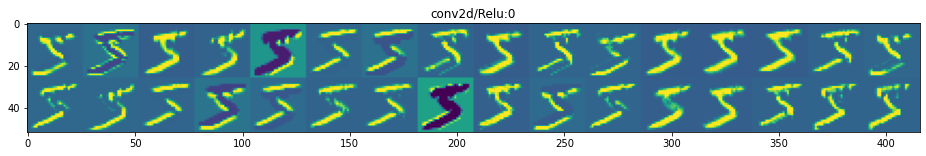

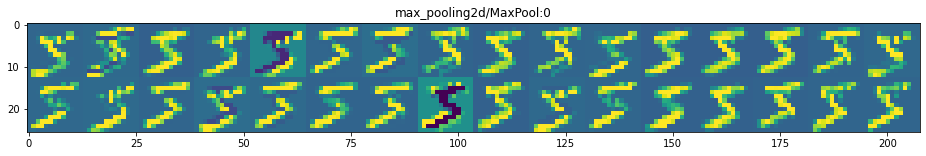

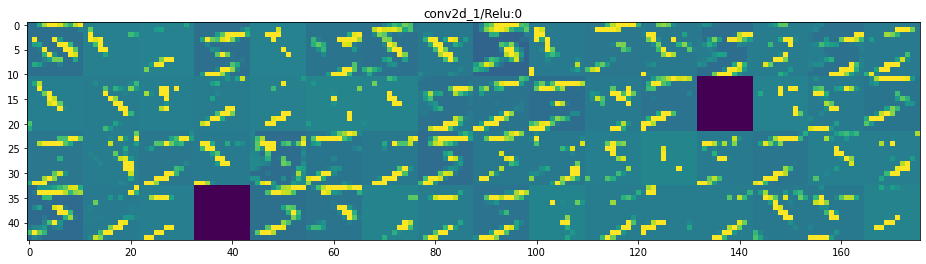

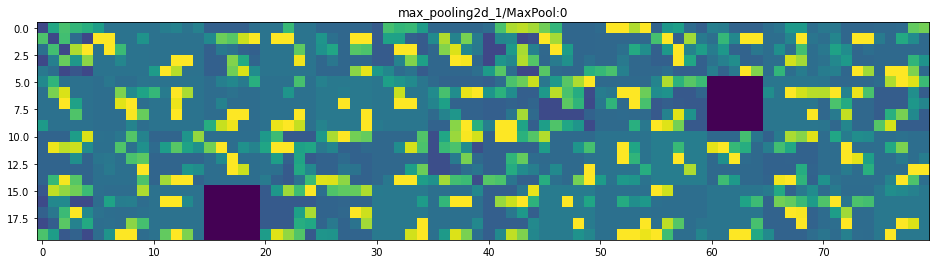

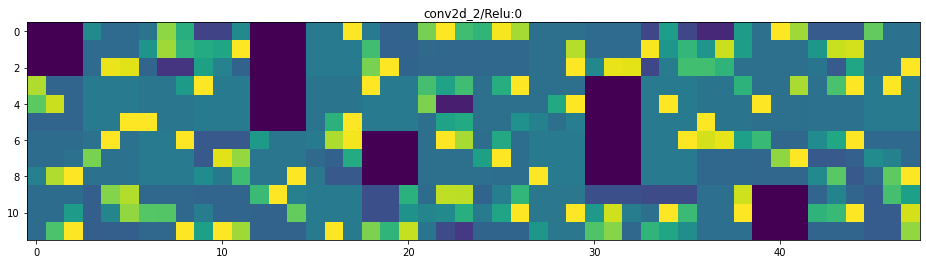

In [48]:
plot_all_activations(activation_model, x_train[0:1,])